In [1]:
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import netCDF4  # or import h5netcdf
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
from tqdm import tqdm
import sys

In [3]:
import geopandas as gpd
from shapely.geometry import Point

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [5]:
# Import PyTorch
import torch
from torch import nn
import torch.optim as optim
import  torchvision.transforms as transforms

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import models, transforms

# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0
torchvision version: 0.21.0+cpu


In [6]:
seed = 42  # Choose any number

# Set seed for PyTorch
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)  # If using CUDA
torch.cuda.manual_seed_all(seed)  # If using multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Set seed for NumPy and Python's random module
np.random.seed(seed)
random.seed(seed)

In [7]:
# Load from JSON file
with open(r"../data/species_universe_filtered_10.json", "r") as file:
    species_universe = json.load(file)
label_encoder = LabelEncoder()
label_encoder.fit(list(species_universe.keys()))
# Save the LabelEncoder
# with open('label_encoder.pkl', 'wb') as f:
#     pickle.dump(label_encoder, f)
for species, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{species}: {encoded_label}")
    break

Abies alba: 0


In [8]:
# pickle.dump(df_2018, open(r"../data/10_filtered_vectorized_gbif_assemblages_climatic_2018_32.pkl", "wb"))

with open(r"../data/Full_Scale/NO_NORM_10_filtered_vectorized_gbif_assemblages_climatic_2018_32.pkl", "rb") as file:
    df_2018 = pickle.load(file)
# with open(r"../data/Full_Scale/10_filtered_vectorized_gbif_assemblages_climatic_2018_32.pkl", "rb") as file:
#     df_2018 = pickle.load(file)

df_2018

,grid_index,year,species,longitude,latitude,climatic_map,species_vector
7,79231,2018,"[Tripolium pannonicum, Dactylorhiza majalis, L...",5.172939,59.201189,"[[[1683.7528, 5.519322, 3.3987396, 0.0, 8.9500...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
33,80722,2018,"[Lonicera periclymenum, Honckenya peploides, T...",5.192753,59.193655,"[[[1683.6528, 5.538444, 3.4088492, 0.0, 8.9500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
39,80723,2018,"[Ficaria verna, Sanguisorba officinalis, Primu...",5.190191,59.202504,"[[[1683.9529, 5.5403404, 3.409945, 0.0, 8.9500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
43,80725,2018,"[Aegopodium podagraria, Galium aparine, Lotus ...",5.185063,59.220202,"[[[1686.1528, 5.5625405, 3.4222465, 0.0, 8.950...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
49,80726,2018,"[Calluna vulgaris, Silene flos-cuculi, Thlaspi...",5.182497,59.229051,"[[[1685.7528, 5.5678606, 3.425452, 0.0, 8.9500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
71381,1682879,2018,"[Lathyrus japonicus, Plantago maritima, Urtica...",28.683087,70.178482,"[[[868.0514, 4.2234592, 1.9842739, 3.82849, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71399,1694813,2018,"[Leymus arenarius, Hippuris lanceolata, Parnas...",28.876395,70.144992,"[[[794.05133, 4.4363422, 2.107863, 4.669275, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71464,1727626,2018,"[Atriplex nudicaulis, Oxytropis campestris, As...",29.370979,70.004077,"[[[852.3514, 4.3516016, 2.096137, 4.190889, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71687,1785872,2018,"[Phyllodoce caerulea, Cerastium alpinum, Pyrol...",30.743051,70.420846,"[[[619.30133, 4.6943803, 3.1129315, 6.97204, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Pytorch Dataset

In [9]:
class MultiLabelDataset(Dataset):
    def __init__(self):
        # self.x_train, self.x_val, self.x_test, self.y_train, self.y_val, self.y_test = None, None, None, None, None, None
        self.mode = 'test'

        self.images_no_perm = torch.tensor(np.stack(df_2018['climatic_map'].values).astype(np.float32))#.to(device)  # Move data to GPU
        self.labels = torch.tensor(np.stack(df_2018['species_vector'].values).astype(np.float32))#.to(device)  # Move labels to GPU
        self.images = []
        self.idx = df_2018.index.to_list()
        
        permuted_images = []
        for image in self.images_no_perm:
            permuted_image = image.permute(2, 0, 1)
            self.images.append(permuted_image)
        
        

    # def train_val_test_split(self):
    #     self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.images, self.labels, test_size = 0.15, random_state=42)
    #     self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.x_train, self.y_train, test_size = 0.15, random_state=42)
    def __len__(self):

        if self.mode == 'test':
            return len(self.images)


    def __getitem__(self, idx):
        if self.mode == 'test':
            sample = {'images': self.images[idx], 'labels': self.labels[idx], 'index': self.idx[idx]}

        return sample

In [10]:
class MultiLabelDatasetRescale(Dataset):
    def __init__(self):
        # self.x_train, self.x_val, self.x_test, self.y_train, self.y_val, self.y_test = None, None, None, None, None, None
        self.mode = 'test'
        
         # Stack and convert to float32 tensor
        raw_images = torch.tensor(np.stack(df_2018['climatic_map'].values).astype(np.float32))  # shape: [N, H, W, C]
        self.labels = torch.tensor(np.stack(df_2018['species_vector'].values).astype(np.float32))

        # Transpose to  [C, H, W] for PyTorch
        # raw_images = raw_images.permute(2, 0, 1)
        raw_images = raw_images.permute(0, 3, 1, 2)

        # === NORMALIZE EACH CHANNEL INDEPENDENTLY ===
        # These must match the order of your channels!
        mins = torch.tensor([
            1.9000409841537476,          # gdd5
            1.44621741771698,            # prsd
            0.9102739691734314,          # bio12d
            0.009359435178339481,         # swe
            -9.149993896484375,          # bio01d
            3.1500244140625,             # bio04d
            0.0,                         # cdd
            0.0,                         # fd
            1.0523613691329956,          # bio15d
            0.0,                         # scd
            0.0,                         # altitude
        ])

        maxs = torch.tensor([
            3858.301513671875, # gdd5
            29.09852409362793, # prsd
            21.650711059570312, #bio12d
            113.7122802734375, # swe
            10.45001220703125, #bio01d
            157.55001831054688, #bio04d
            8.0, #cdd
            362.0, # fd
            2.7762691974639893, #bio15d
            365.0, # scd
            2296.0, #altitude
        ])

        # Avoid division by zero (e.g., for crs with constant 0)
        ranges = maxs - mins
        ranges[ranges == 0] = 1  # Prevent division by zero

        # Apply scaling: (x - min) / (max - min)
        # self.images = (raw_images - mins.view(-1, 1, 1)) / ranges.view(-1, 1, 1)

        
        self.images = (raw_images - mins.view(1, -1, 1, 1)) / ranges.view(1, -1, 1, 1)
        self.idx = df_2018.index.to_list()
        
    def __len__(self):
        if self.mode == 'test':
            
            return len(self.images)


    def __getitem__(self, idx):
        if self.mode == 'test':
            sample = {'images': self.images[idx], 'labels': self.labels[idx], 'index': self.idx[idx]}

        return sample

### Custom Loss

In [11]:
import torch.nn.functional as F
import torch.distributed as dist
import argparse

class CustomLoss(nn.Module):
    def __init__(self, loss_fn, args):
        super(CustomLoss, self).__init__()
        self.loss_fn = loss_fn
        self.weighted = args.weighted
        self.args = args
        if self.weighted:
            self.samples_per_cls = list(args.train_label_cnt.values())
            self.no_of_classes = args.num_classes

    def compute_weights(self, labels, beta=0.9999):
        effective_num = 1.0 - np.power(beta, self.samples_per_cls)
        weights = (1.0 - beta) / np.array(effective_num)
        weights = weights / weights.sum() * self.no_of_classes
        labels_one_hot = labels

        weights = torch.tensor(weights).float().to(self.args.device, non_blocking=True)
        weights = weights.unsqueeze(0)
        weights = weights.repeat(labels_one_hot.shape[0],1) * labels_one_hot
        
        return weights
    
    def forward_focal(self, logits, labels,alpha=0.999,gamma=2.0):
        p = torch.sigmoid(logits)
        ce_loss = F.binary_cross_entropy_with_logits(logits, labels, reduction="none")
        p_t = p * labels + (1 - p) * (1 - labels)
        loss = ce_loss * ((1 - p_t) ** gamma)
        
        if self.weighted:
            weights = self.compute_weights(labels)
            weights_t = weights * labels * alpha + (1 - labels) * (1 - alpha)
            weighted_loss = weights_t * loss
            focal_loss = weighted_loss.mean()
        
        else:
            alpha_t = alpha * labels + (1 - alpha) * (1 - labels)
            focal_loss = alpha_t * loss
            focal_loss = focal_loss.mean()
        
        return focal_loss

    
    def forward_bce(self, logits, labels):
        if self.weighted:
            weights = self.compute_weights(labels)
            bce_loss = F.binary_cross_entropy_with_logits(logits, labels, pos_weight = weights)
        else:
            bce_loss = F.binary_cross_entropy_with_logits(logits, labels)
        
        return bce_loss
    
    
    def forward_dice(self, logits, labels):
        p = torch.sigmoid(logits)
        smooth = 1.0
        intersection = (p * labels).sum(0)
        total = (p**2 + labels**2).sum(0)
        dice_loss = 1 - (intersection + smooth)/(total + smooth)
        
        return dice_loss.mean()
    
    
    def forward(self, logits, labels):
        if self.loss_fn == 'bce':
            return self.forward_bce(logits, labels)
        elif self.loss_fn == 'focal':
            return self.forward_focal(logits, labels)
        elif self.loss_fn == 'dice':
            return self.forward_dice(logits, labels)

### CNN architecture

In [12]:
class CustomResNet18(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet18, self).__init__()

        # Load Pretrained ResNet18
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        
        # Replace ReLU activations with inplace=False to avoid in-place modification issues
        # self.resnet.relu = nn.ReLU(inplace=False)

        # Modify the first convolutional layer to accept 11 channels instead of 3
        self.resnet.conv1 = nn.Conv2d(11, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Access layers up to the last block of layer4
        # self.features_conv = self.resnet.layer4[-1]  # Excluding the last block in layer4
        self.hook = self.resnet.layer3[-1].conv2.register_forward_hook(self.hook_fn)
        self.activations = None

        # Modify the final fully connected layer to match the number of classes     
        self.in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.in_features, num_classes)

        # Freeze all layers initially
        for param in self.resnet.parameters():
            param.requires_grad = False

        # Placeholder for gradients
        self.gradients = None

    # Hook for capturing gradients during backward pass
    def activations_hook(self, grad):
        self.gradients = grad
        
    def hook_fn(self, module, input, output):
        # Store activations from the last convolutional layer
        self.activations = output
        
    # Forward pass through the network
    def forward(self, x):
        # Pass through the layers until the last convolutional block
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        # Register the hook on the output of the last convolutional layer (conv2 of the last block)
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)
        
        # Register hook on the output of the last convolutional layer in layer4[1]
        x.requires_grad_()  # Enable gradient computation for this tensor
        h = x.register_hook(self.activations_hook)
        
        # Continue through the network
        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.resnet.fc(x)
        
        return x
    
    def get_embedding(self, x):
        # Forward pass up to avgpool
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)  # Shape: [batch_size, 2048]
        return x
    
    # Method to get the captured gradients
    def get_activations_gradient(self):
        return self.gradients

    # Method to get activations from the last convolutional layer (optional)
    def get_activations(self):
        return self.activations
    

In [14]:
# Load the NumPy array from the pickle file
# with open('../models/old_no_norm/thresholds_focal_RESNET18_49_tss_2017.pkl', 'rb') as f:
#     loaded_thresholds = pickle.load(f)

with open('../models/thresholds_FOCAL_RESNET18_53_tss_1991-2017_full.pkl', 'rb') as f:
    loaded_thresholds = pickle.load(f)
global_threshold = np.mean(loaded_thresholds[np.isfinite(loaded_thresholds)])
global_threshold
# with open('../models/thresholds_BCE_60_tss.pkl', 'rb') as f:
#     loaded_thresholds = pickle.load(f)

np.float32(0.5011627)

In [15]:
PATH = '../models/RESNET18_53_FOCAL_tss_1991-2017_full'
# PATH = '../models/old_no_norm/RESNET18_49_tss_2017'

In [16]:
num_classes = 1819
device = torch.device('cpu')
MODEL = CustomResNet18(num_classes=num_classes).to(device)
# MODEL = CNNModel_1(11,32,num_classes).to(device)

# MODEL.load_state_dict(torch.load(PATH, weights_only=True)) # if GPU is available


MODEL.load_state_dict(torch.load(PATH, weights_only=True, map_location=torch.device('cpu')))
# model.to(args.device) 
MODEL.eval()

CustomResNet18(
  (resnet): ResNet(
    (conv1): Conv2d(11, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [17]:
# Load the grid from pickle
# with open('../data/class_counts.json', 'r') as f:
#     class_counts_dict = json.load(f)
with open('../data/species_counts_filtered_10_1991_2017.json', 'r') as f:
    class_counts_dict = json.load(f)

In [18]:
# Example args (you can replace it with your actual arguments)
class Args:
    def __init__(self):
        self.weighted = True  # Set to False if no class weighting is needed
        self.train_label_cnt = class_counts_dict  # Example class counts
        self.num_classes = 1819  # Binary classification
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model_type = 'CNN'
        self.eval = False
        # self.thres_method = 'adaptive'
        self.thres_method = 'global'
        self.threshold = global_threshold

In [19]:
# Function to set the seed for each worker
def seed_worker(worker_id):
    # Set seed for Python and NumPy in each worker
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [20]:
args = Args()
# mlc_dataset = MultiLabelDataset()
mlc_dataset = MultiLabelDatasetRescale()

print(len(mlc_dataset))
# mlc_dataset.train_val_test_split()
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = False, worker_init_fn=seed_worker)

5029


In [21]:
def species_vectors(model, eval_loader, criterion, thresholds, args):
    model.eval()
    eval_loss = []
    all_preds = {}

    with torch.no_grad():
        for batch in eval_loader:
            samples = batch['images'].to(args.device, non_blocking=True)
            targets = batch['labels'].to(args.device, non_blocking=True)
            index = batch['index'].to(args.device, non_blocking=True)
            
            outputs = model(samples)
            loss = criterion(outputs, targets)
            eval_loss.append(loss.item())

            # Threshold logic
            if args.thres_method == 'adaptive':
                thresholds_tensor = torch.tensor(thresholds, dtype=torch.float32).to(args.device)
            elif args.thres_method == 'global':
                thresholds_tensor = torch.tensor([args.threshold] * outputs.shape[1], dtype=torch.float32).to(args.device)
            else:
                raise ValueError("Unknown threshold method")

            probs = torch.sigmoid(outputs)
            preds = (probs >= thresholds_tensor).float()

            # Append each prediction individually to the list
            for i, pred in zip(index, preds):
                index_number = i.item()

                # print(index_number)
                all_preds[index_number] = pred.cpu().numpy()

    return all_preds


In [22]:
prob_dic = species_vectors(model = MODEL,eval_loader = dataloader, criterion = CustomLoss('focal', args), thresholds = loaded_thresholds, args = Args())
# prob_dic = species_vectors(model = MODEL,eval_loader = dataloader, criterion = CustomLoss('bce', args), thresholds = loaded_thresholds, args = Args())

In [23]:
# prob_dic

In [24]:
# Wrap each vector in a list so it stays in a single column
preds_df = pd.DataFrame({
    "predicted_vector": [v for v in prob_dic.values()]
}, index=prob_dic.keys())


In [25]:
df_2018_with_preds = df_2018.join(preds_df, how='left')
df_2018_with_preds

,grid_index,year,species,longitude,latitude,climatic_map,species_vector,predicted_vector
7,79231,2018,"[Tripolium pannonicum, Dactylorhiza majalis, L...",5.172939,59.201189,"[[[1683.7528, 5.519322, 3.3987396, 0.0, 8.9500...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
33,80722,2018,"[Lonicera periclymenum, Honckenya peploides, T...",5.192753,59.193655,"[[[1683.6528, 5.538444, 3.4088492, 0.0, 8.9500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
39,80723,2018,"[Ficaria verna, Sanguisorba officinalis, Primu...",5.190191,59.202504,"[[[1683.9529, 5.5403404, 3.409945, 0.0, 8.9500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
43,80725,2018,"[Aegopodium podagraria, Galium aparine, Lotus ...",5.185063,59.220202,"[[[1686.1528, 5.5625405, 3.4222465, 0.0, 8.950...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
49,80726,2018,"[Calluna vulgaris, Silene flos-cuculi, Thlaspi...",5.182497,59.229051,"[[[1685.7528, 5.5678606, 3.425452, 0.0, 8.9500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
71381,1682879,2018,"[Lathyrus japonicus, Plantago maritima, Urtica...",28.683087,70.178482,"[[[868.0514, 4.2234592, 1.9842739, 3.82849, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
71399,1694813,2018,"[Leymus arenarius, Hippuris lanceolata, Parnas...",28.876395,70.144992,"[[[794.05133, 4.4363422, 2.107863, 4.669275, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
71464,1727626,2018,"[Atriplex nudicaulis, Oxytropis campestris, As...",29.370979,70.004077,"[[[852.3514, 4.3516016, 2.096137, 4.190889, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
71687,1785872,2018,"[Phyllodoce caerulea, Cerastium alpinum, Pyrol...",30.743051,70.420846,"[[[619.30133, 4.6943803, 3.1129315, 6.97204, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."


In [26]:
def calculate_sp_richness(species_vectors):
    richness = []
    for i in species_vectors:
        nonzero = np.count_nonzero(i)
        richness.append(nonzero)
    return richness
df_2018_with_preds['true_richness'] = calculate_sp_richness(df_2018_with_preds['species_vector'])    
df_2018_with_preds['predicted_richness'] = calculate_sp_richness(df_2018_with_preds['predicted_vector'])    
df_2018_with_preds

,grid_index,year,species,longitude,latitude,climatic_map,species_vector,predicted_vector,true_richness,predicted_richness
7,79231,2018,"[Tripolium pannonicum, Dactylorhiza majalis, L...",5.172939,59.201189,"[[[1683.7528, 5.519322, 3.3987396, 0.0, 8.9500...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",22,429
33,80722,2018,"[Lonicera periclymenum, Honckenya peploides, T...",5.192753,59.193655,"[[[1683.6528, 5.538444, 3.4088492, 0.0, 8.9500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",6,392
39,80723,2018,"[Ficaria verna, Sanguisorba officinalis, Primu...",5.190191,59.202504,"[[[1683.9529, 5.5403404, 3.409945, 0.0, 8.9500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",5,413
43,80725,2018,"[Aegopodium podagraria, Galium aparine, Lotus ...",5.185063,59.220202,"[[[1686.1528, 5.5625405, 3.4222465, 0.0, 8.950...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",95,429
49,80726,2018,"[Calluna vulgaris, Silene flos-cuculi, Thlaspi...",5.182497,59.229051,"[[[1685.7528, 5.5678606, 3.425452, 0.0, 8.9500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",101,454
...,...,...,...,...,...,...,...,...,...,...
71381,1682879,2018,"[Lathyrus japonicus, Plantago maritima, Urtica...",28.683087,70.178482,"[[[868.0514, 4.2234592, 1.9842739, 3.82849, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",5,217
71399,1694813,2018,"[Leymus arenarius, Hippuris lanceolata, Parnas...",28.876395,70.144992,"[[[794.05133, 4.4363422, 2.107863, 4.669275, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",5,214
71464,1727626,2018,"[Atriplex nudicaulis, Oxytropis campestris, As...",29.370979,70.004077,"[[[852.3514, 4.3516016, 2.096137, 4.190889, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",7,210
71687,1785872,2018,"[Phyllodoce caerulea, Cerastium alpinum, Pyrol...",30.743051,70.420846,"[[[619.30133, 4.6943803, 3.1129315, 6.97204, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",10,276


In [27]:
for i in range(df_2018_with_preds.shape[0]):
    print(df_2018_with_preds['true_richness'].iloc[i],' : ',df_2018_with_preds['predicted_richness'].iloc[i])

22  :  429
6  :  392
5  :  413
95  :  429
101  :  454
120  :  475
18  :  427
11  :  443
13  :  385
14  :  511
29  :  524
6  :  591
6  :  381
13  :  460
25  :  497
155  :  565
42  :  526
18  :  543
8  :  458
17  :  572
7  :  533
34  :  519
33  :  544
8  :  478
97  :  500
62  :  527
9  :  499
14  :  450
6  :  525
11  :  509
16  :  528
10  :  584
19  :  569
6  :  517
151  :  508
176  :  517
138  :  520
103  :  554
98  :  572
49  :  562
52  :  481
78  :  492
32  :  511
9  :  457
10  :  574
9  :  605
51  :  543
66  :  530
37  :  494
150  :  493
34  :  483
15  :  498
99  :  522
86  :  530
138  :  547
139  :  546
7  :  517
12  :  498
45  :  505
5  :  567
51  :  521
59  :  489
95  :  484
17  :  474
142  :  474
26  :  490
30  :  495
42  :  523
6  :  543
87  :  515
35  :  528
6  :  449
5  :  471
5  :  499
31  :  651
17  :  645
25  :  627
103  :  605
10  :  505
12  :  484
34  :  449
71  :  428
35  :  469
9  :  474
38  :  481
23  :  531
159  :  517
12  :  494
7  :  502
23  :  519
23  :  511
18  : 

### Plot Samples 2018 in Norway

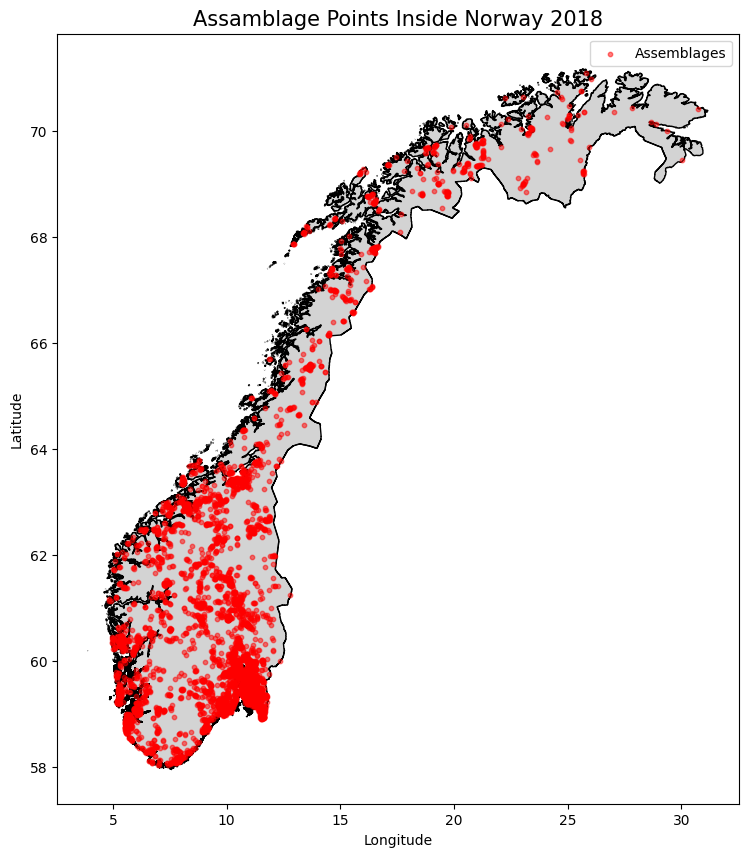

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


# Load the shapefile of Norway's boundaries (assuming you have this shapefile)
norway = gpd.read_file(r"../data/gadm41_NOR_shp/gadm41_NOR_0.shp").to_crs(epsg=4326)  # Make sure it's in EPSG:4326 for plotting

# Step 2: Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Norway boundary
norway.plot(ax=ax, color="lightgray", edgecolor="black")

# Assuming 'result' DataFrame has columns 'longitude' and 'latitude' (from the grid centroids)
result_geo_df = gpd.GeoDataFrame(
    df_2018_with_preds, 
    geometry=gpd.points_from_xy(df_2018_with_preds.longitude, df_2018_with_preds.latitude),
    crs="EPSG:4326"  # Ensure the correct CRS
)

# Plot the filtered points inside Norway
result_geo_df.plot(ax=ax, markersize=10, color='red', alpha=0.5, label="Assemblages")

# Customize plot
ax.set_title("Assamblage Points Inside Norway 2018", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

# Show the plot
plt.show()


### Plotting Species Richness Heatmap

In [29]:
def points_species_richness_plot(df, column_name, ax):
    # Load the shapefile of Norway's boundaries
    norway = gpd.read_file(r"../data/gadm41_NOR_shp/gadm41_NOR_0.shp").to_crs(epsg=4326)  # Make sure it's in EPSG:4326 for plotting
    
    # Assuming 'df' contains your data with species richness in 'column_name' column
    # Step 1: Create GeoDataFrame from the DataFrame
    result_geo_df = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df.longitude, df.latitude),
        crs="EPSG:4326"  # Ensure the correct CRS
    )
    
    # Step 2: Plot the map
    # Plot the Norway boundary
    norway.plot(ax=ax, color="lightgray", edgecolor="black")
    
    # Step 3: Plot the points with species richness as colors
    result_geo_df.plot(
        ax=ax, 
        column=column_name,  # Use the column passed to the function
        cmap='YlGnBu',  # Colormap for heatmap, you can try others like 'viridis', 'plasma', etc.
        markersize=30, 
        legend=True,  # Add legend for color scale
        alpha=0.7  # Make points slightly transparent for better visualization
    )
    
    # Customize plot
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"{column_name} in Norway (2018)", fontsize=15)

from shapely.geometry import box


def squares_species_richness_plot(df, column_name, ax, cell_size=0.2):
    # Load Norway boundary
    norway = gpd.read_file("../data/gadm41_NOR_shp/gadm41_NOR_0.shp").to_crs(epsg=4326)

    # Create square geometry centered on each point
    half_size = cell_size / 2
    df['geometry'] = df.apply(
        lambda row: box(
            row['longitude'] - half_size,
            row['latitude'] - half_size,
            row['longitude'] + half_size,
            row['latitude'] + half_size
        ), axis=1
    )

    # Convert to GeoDataFrame
    result_geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

    # Plot Norway map
    norway.plot(ax=ax, color="lightgray", edgecolor="black")

    # Plot richness squares
    result_geo_df.plot(
        ax=ax,
        column=column_name,
        cmap='YlGnBu',
        legend=True,
        edgecolor='none',  # No borders on squares
        alpha=0.9
    )

    # Customize plot
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"{column_name} in Norway (2018)", fontsize=15)



In [ ]:
# Create subplots to show both true_richness and predicted_richness side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Create 1 row, 2 columns of subplots

# Plot the true richness on the first subplot
points_species_richness_plot(df=df_2018_with_preds, column_name='true_richness', ax=axes[0])

# Plot the predicted richness on the second subplot
points_species_richness_plot(df=df_2018_with_preds, column_name='predicted_richness', ax=axes[1])

# Adjust the layout to avoid overlapping
plt.tight_layout()

plt.savefig('../Images/SpeciesRichness.png')

# Show the plots
plt.show()
